In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [106]:
# Wczytanie zbioru win oraz nawaznie kolumn

wines = pd.read_table("wine.data",sep=',',names=["Class","Alcochol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavaniods","Nonflavanoid phenols","Proanthocyanins"
             ,"Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])

In [107]:
classes = wines.pop('Class')
wines.head()

,Alcochol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavaniods,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
# Skalowanie danych

scaler = StandardScaler()
scaler.fit(wines)

scaled_data = scaler.transform(wines)

In [79]:
# pętla dla wszystkich możliwych ilości składowych głownych dla analiza PCA

std = []

for i in range(1,14):
    pca = PCA(n_components=i)
    pca.fit(scaled_wines)
    x_pca = pca.transform(scaled_wines)
    std.append(x_pca.std())

In [80]:
# Akumulacja listy wartości odchylenia standarowego

summed_std = [sum(std[:x]) for x in range(1,14)]

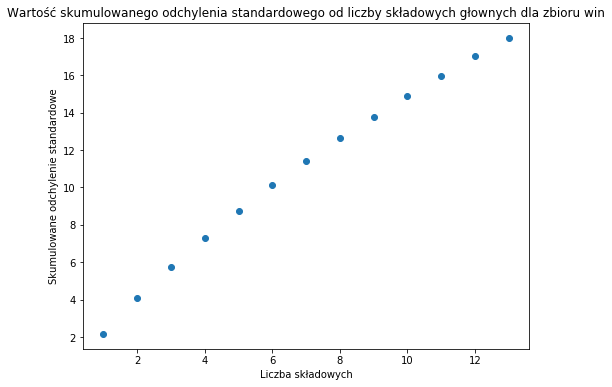

In [128]:
# Wykres skumulowanego odchylenia standardowego od ilości składowych głownych

plt.figure(figsize=(8,6))
plt.scatter(list(range(1,14)),summed_std)
plt.xlabel('Liczba składowych')
plt.ylabel('Skumulowane odchylenie standardowe')
plt.title("Wartość skumulowanego odchylenia standardowego od liczby składowych głownych dla zbioru win")
plt.show()

#### Zgodnie z oczekiwaniami wykres jest monotonicznie rosnący oraz widać, że wartość skumulowanego odchylenia standardowego jest coraz mniejsza wraz ze wzrostem liczby składowych co wynika z samej definicji algorytmu składowych głównych

In [148]:
# Druga cześć

# Wystarczy pca dla 3 składowych

pca = PCA(n_components=3)
pca.fit(scaled_wines)

# zmienione dane do nowych zmiennych
x_pca = pca.transform(scaled_wines)

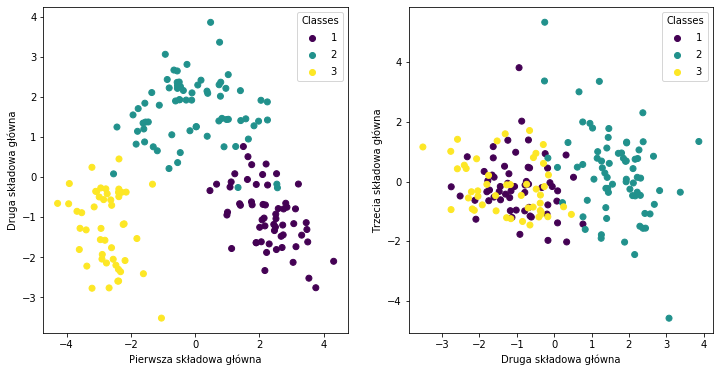

In [149]:
# wykresy punktów w nowych zmiennych

# zmienne 1 i 2
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax1s = ax[0].scatter(x_pca[:,0],x_pca[:,1],c=classes)
ax[0].set_xlabel('Pierwsza składowa główna')
ax[0].set_ylabel('Druga składowa główna')
ax[0].legend(*ax1s.legend_elements(),loc="upper right", title="Classes")

# zmienne 2 i 3
ax2s = ax[1].scatter(x_pca[:,1],x_pca[:,2],c=classes)
ax[1].set_xlabel('Druga składowa główna')
ax[1].set_ylabel('Trzecia składowa główna')
ax[1].legend(*ax2s.legend_elements(),loc="upper right", title="Classes")

plt.show()

#### Na pierwszym wykresie widać wyraźnie, że punkty narysowane w nowych współrzędnych jako pierwsza i druga składowa głowna, są separowalne co potwierdza skuteczność tej metody. Na drugim wykresie, gdzie zastosowana została druga i trzecia składowa główna widać, że w tym przypadku już tylko klasa 2 jest łatwo separowalna od innych.